In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import  StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import  train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

C:\Users\Dell\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
live = pd.read_csv('titanic_train.csv')

In [3]:
### It is a classcification  model
live

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
live=live.drop(['PassengerId','Unnamed: 0','Name','Ticket','Cabin'], axis=1)


In [5]:
live

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [6]:
live.shape

(891, 8)

In [7]:
live.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [8]:
live.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [9]:
#  column vise missing values
round((live.isnull().sum()/live.shape[0])*100,2)

Survived     0.00
Pclass       0.00
Sex          0.00
Age         19.87
SibSp        0.00
Parch        0.00
Fare         0.00
Embarked     0.22
dtype: float64

In [10]:
live['Age']=live['Age'].fillna(live['Age'].mode()[0])
live['Embarked']=live['Embarked'].fillna(live['Embarked'].mode()[0])

In [11]:
live.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [12]:
live.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [13]:
live['Sex'] = live['Sex'].replace({'male': 1, 'female': 0})
live['Embarked'] = live['Embarked'].replace({'S': 1, 'C': 0,'Q':2})
live

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,1
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,1
3,1,1,0,35.0,1,0,53.1000,1
4,0,3,1,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,1
887,1,1,0,19.0,0,0,30.0000,1
888,0,3,0,24.0,1,2,23.4500,1
889,1,1,1,26.0,0,0,30.0000,0


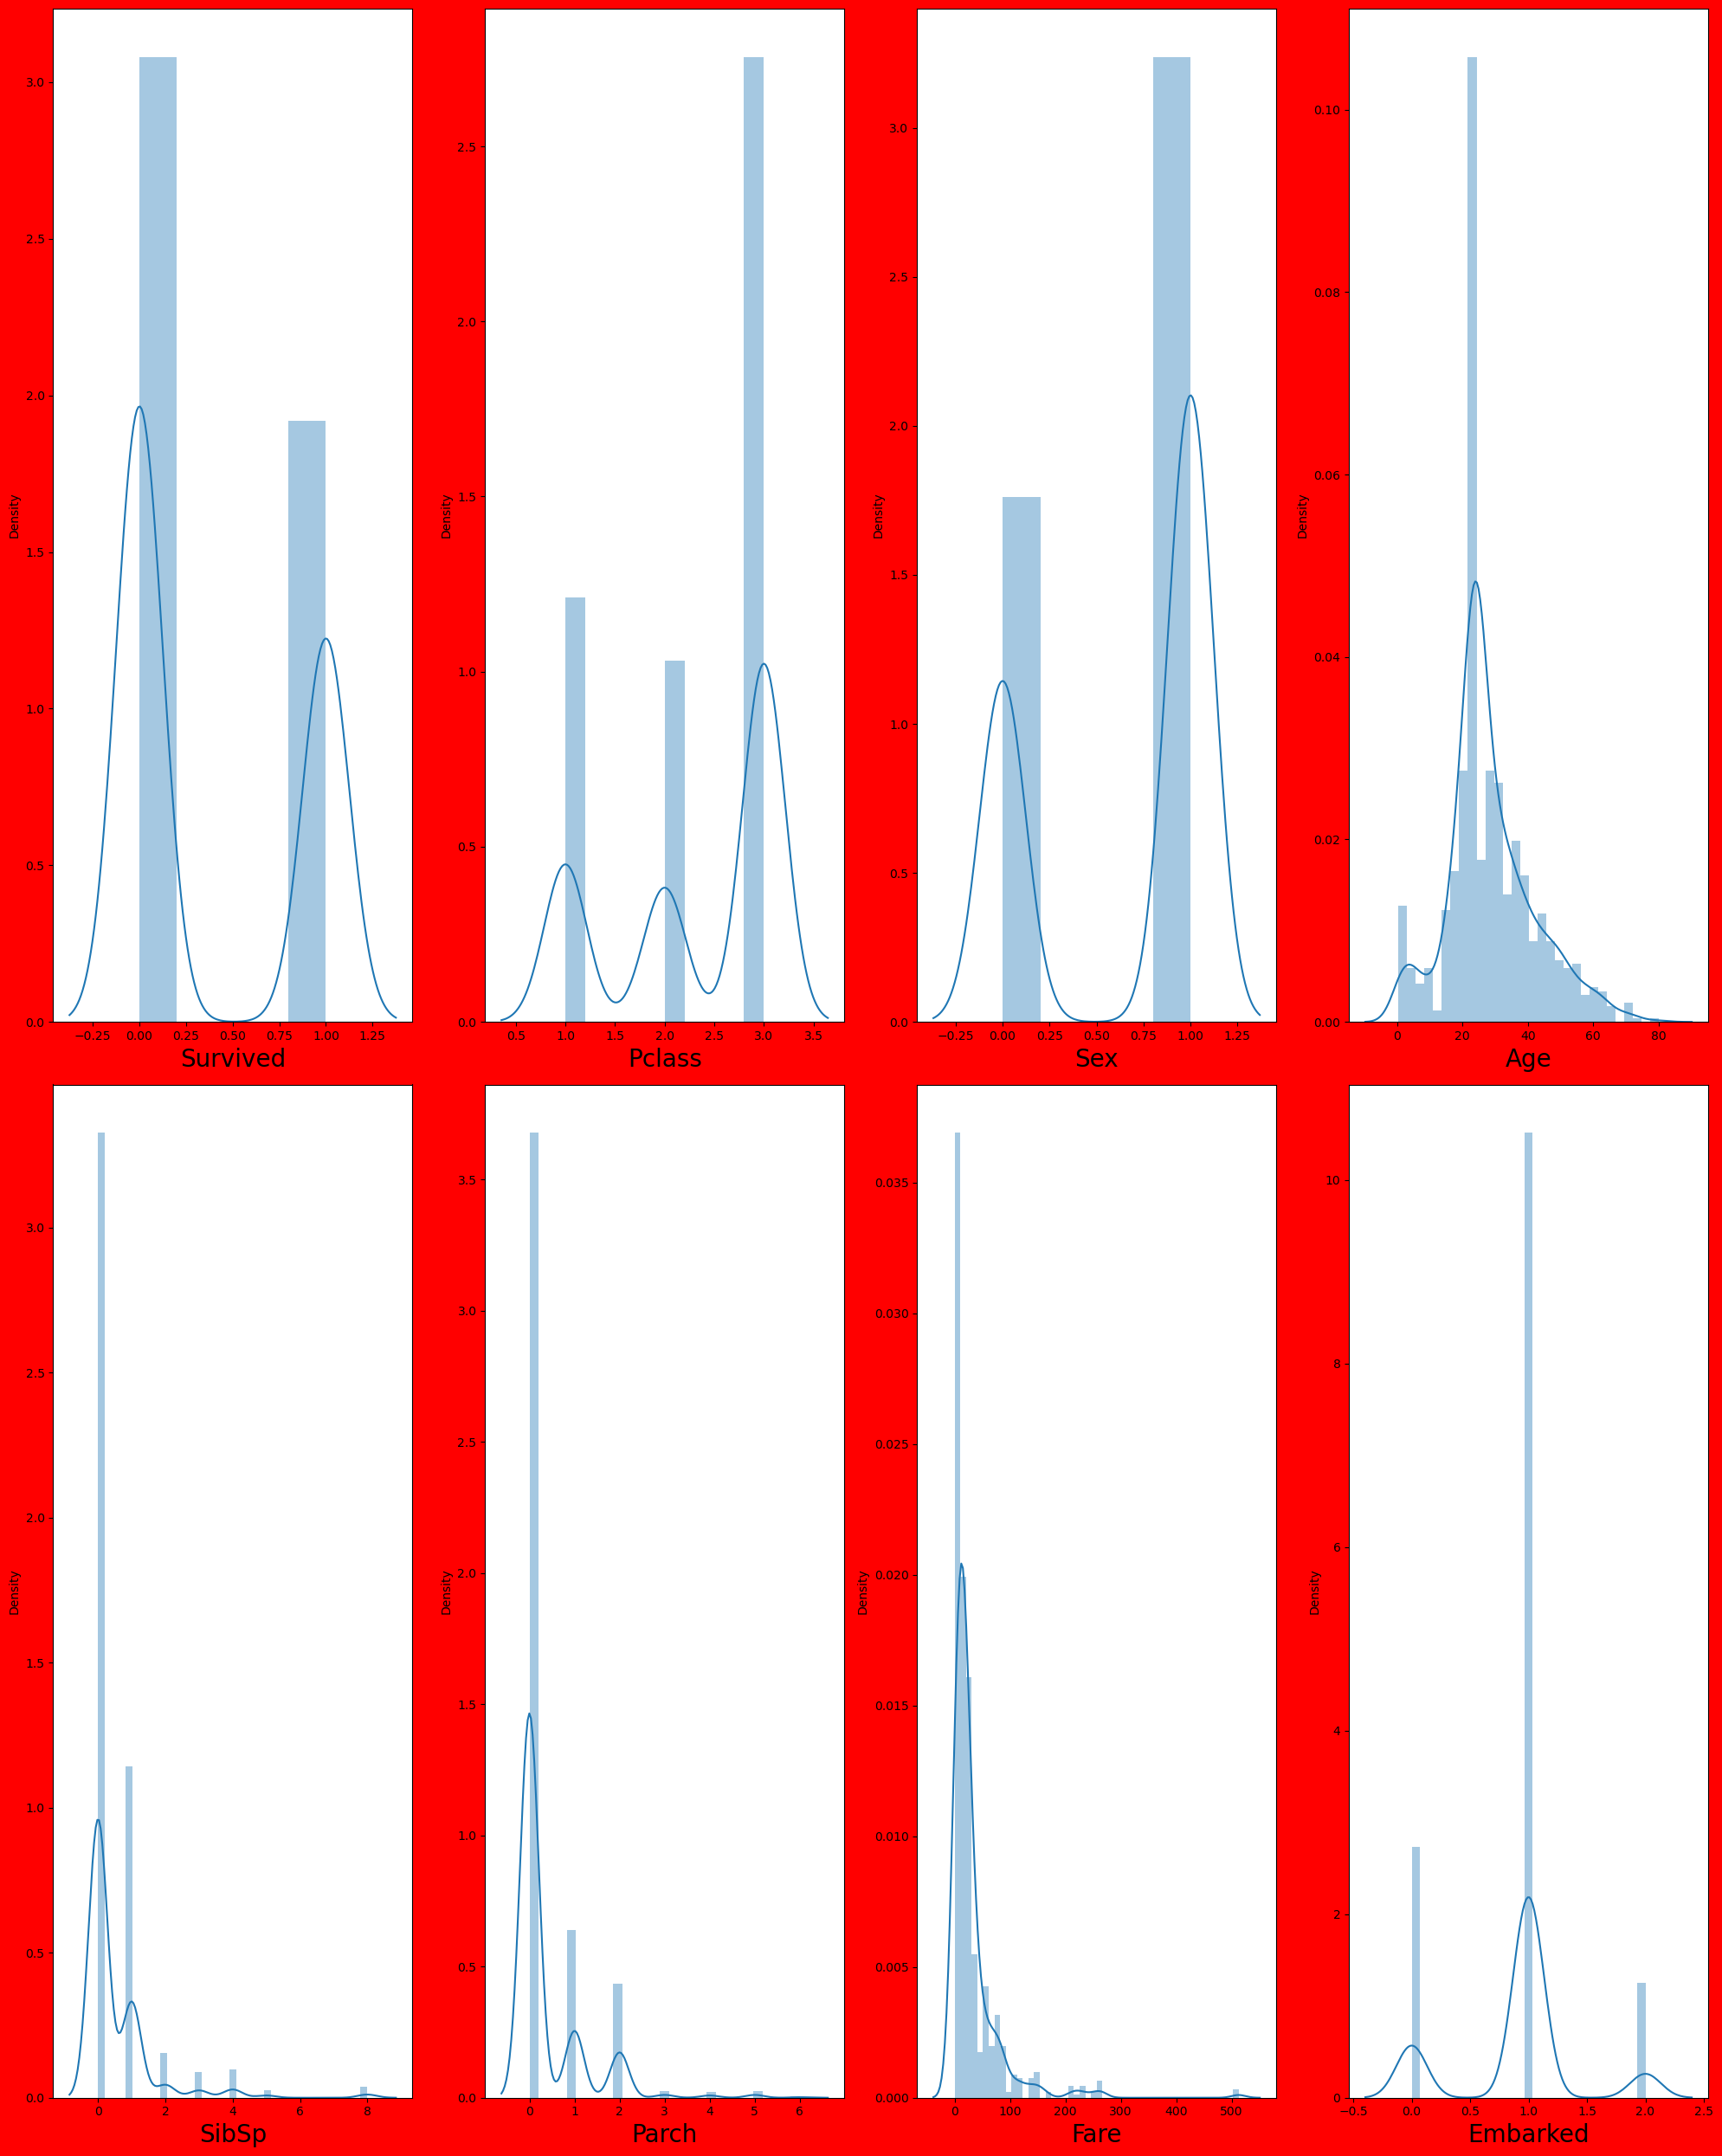

In [14]:
plt.figure(figsize=(20,25),facecolor='red')
plotnum=1
for column in live:
    if plotnum<=8:
        ax= plt.subplot(2,4,plotnum)
        sns.distplot(live[column])
        plt.xlabel(column, fontsize=20)
        
    plotnum+=1
    
plt.tight_layout()

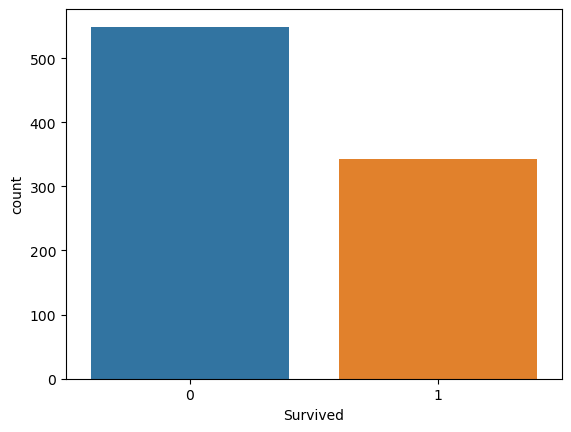

In [15]:
sns.countplot(x='Survived', data=live)
plt.show()

In [16]:
df_features=live.drop('Survived', axis=1)

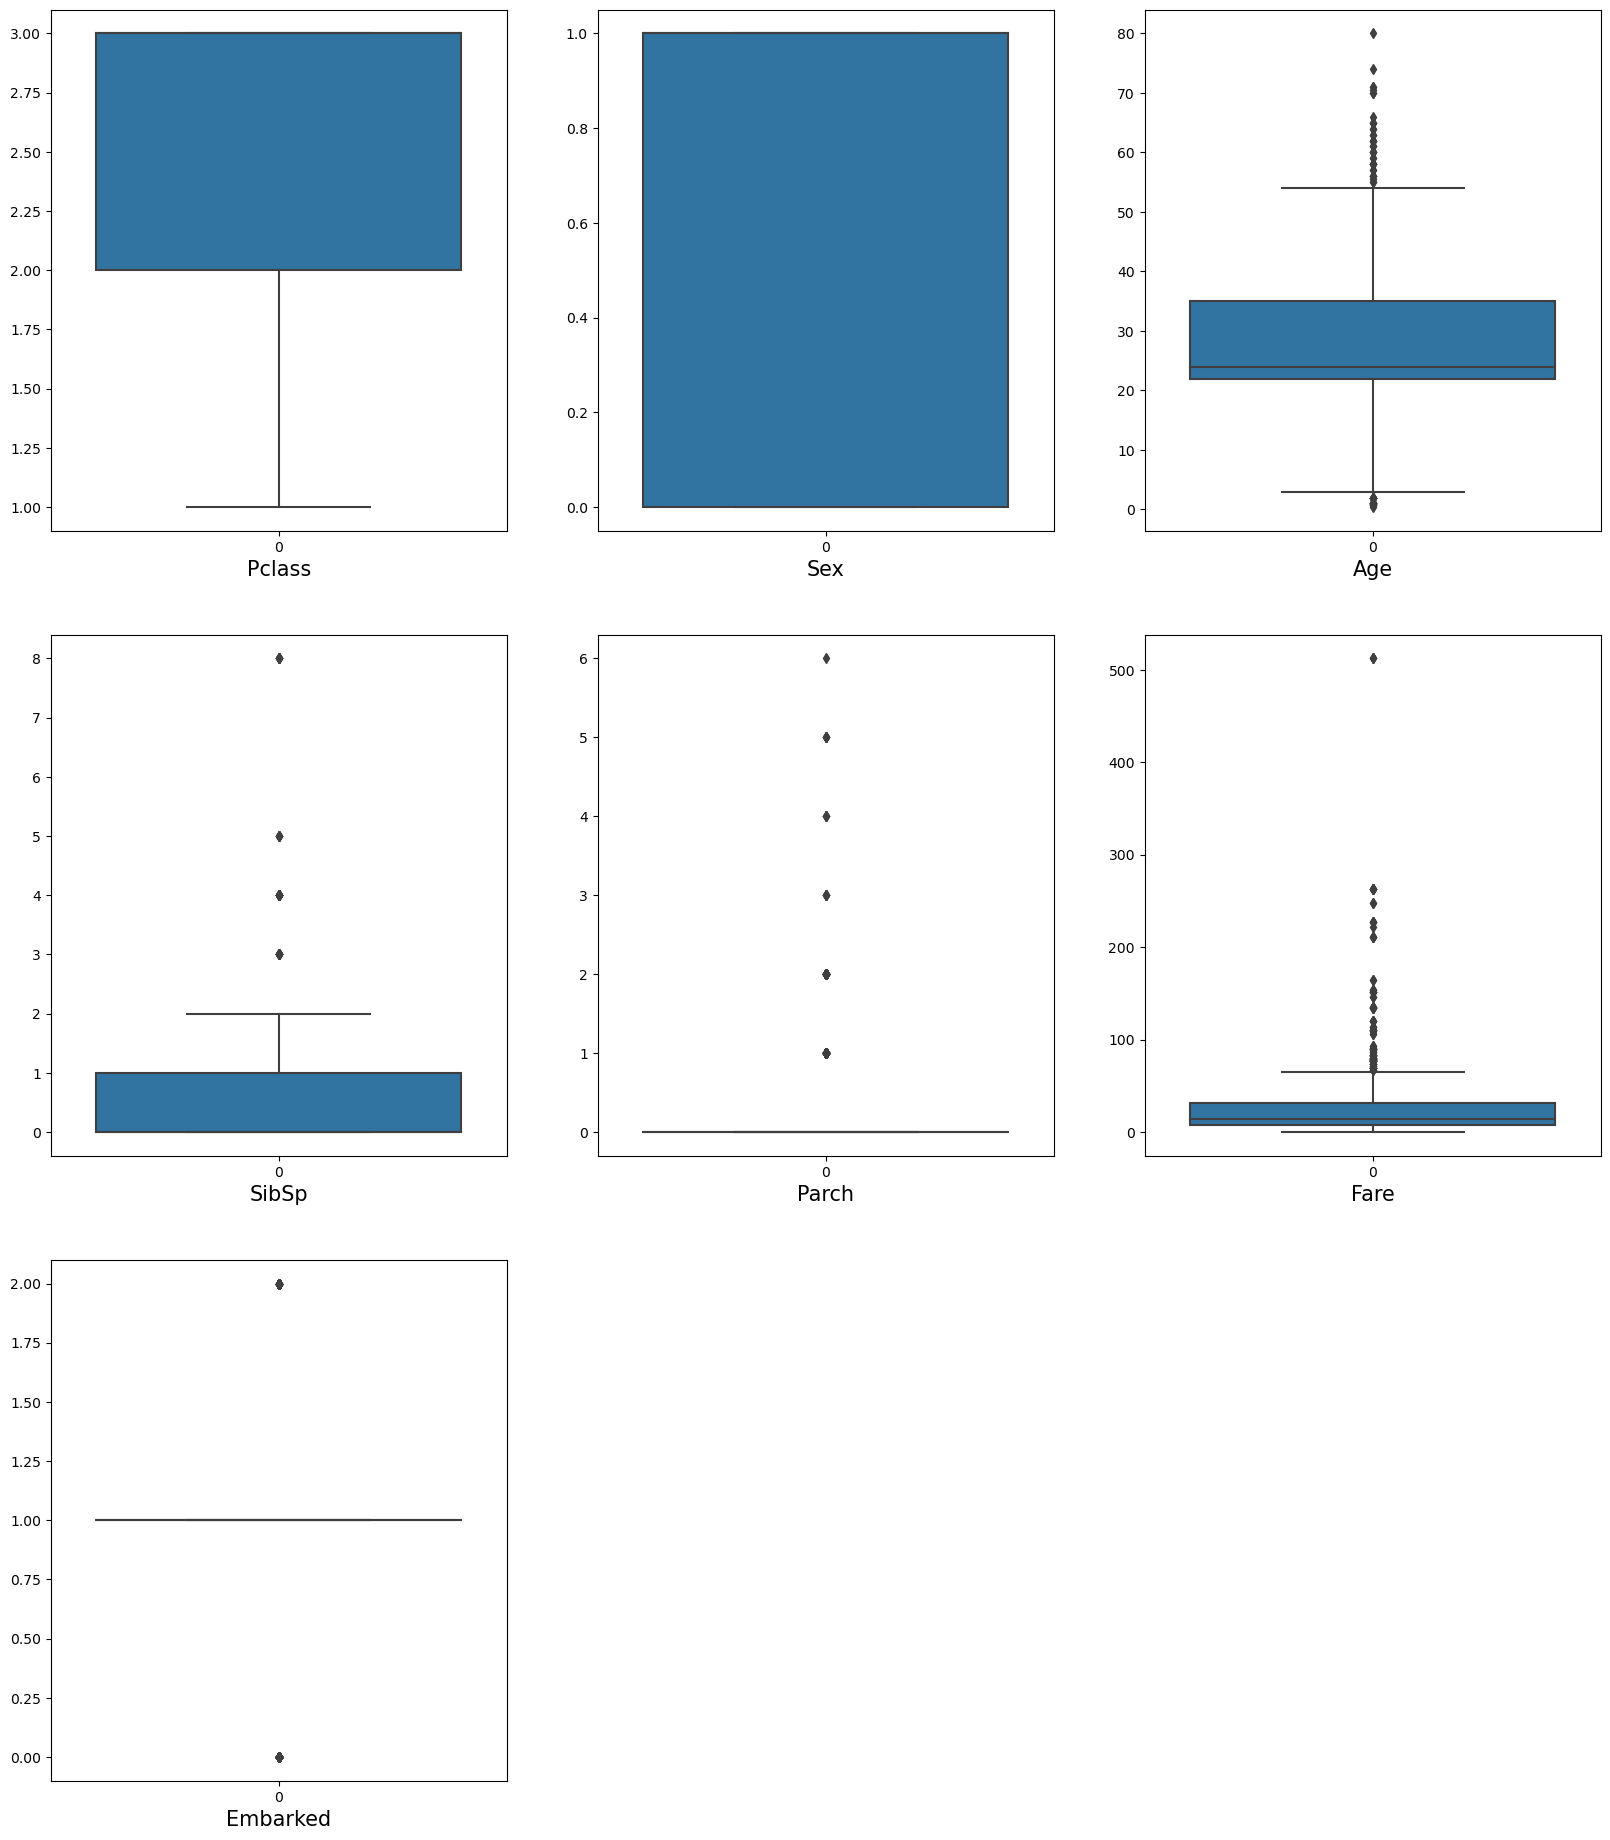

In [17]:
plt.figure(figsize=(20,23))
graph=1
for column in df_features:
    if graph<=8:
        plt.subplot(3,3,graph)
        ax=sns.boxplot(data=df_features[column])
        plt.xlabel(column, fontsize=15)
    graph+=1
plt.show()

In [18]:
q1=live.quantile(0.25)
q3=live.quantile(0.75)
iqr=q3-q1

In [19]:
q1

Survived     0.0000
Pclass       2.0000
Sex          0.0000
Age         22.0000
SibSp        0.0000
Parch        0.0000
Fare         7.9104
Embarked     1.0000
Name: 0.25, dtype: float64

In [20]:
age_high=(q3.Age+(1.5*iqr.Age))
print(age_high)
index=np.where(live['Age']>age_high)
live=live.drop(live.index[index])
print(live.shape)
live.reset_index()

54.5
(849, 8)


,index,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0,3,1,22.0,1,0,7.2500,1
1,1,1,1,0,38.0,1,0,71.2833,0
2,2,1,3,0,26.0,0,0,7.9250,1
3,3,1,1,0,35.0,1,0,53.1000,1
4,4,0,3,1,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...,...,...
844,886,0,2,1,27.0,0,0,13.0000,1
845,887,1,1,0,19.0,0,0,30.0000,1
846,888,0,3,0,24.0,1,2,23.4500,1
847,889,1,1,1,26.0,0,0,30.0000,0


In [21]:
age_low=(q3.Age-(1.5*iqr.Age))
print(age_low)
index=np.where(live['Age']<age_low)
live=live.drop(live.index[index])
print(live.shape)
live.reset_index()

15.5
(766, 8)


,index,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0,3,1,22.0,1,0,7.2500,1
1,1,1,1,0,38.0,1,0,71.2833,0
2,2,1,3,0,26.0,0,0,7.9250,1
3,3,1,1,0,35.0,1,0,53.1000,1
4,4,0,3,1,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...,...,...
761,886,0,2,1,27.0,0,0,13.0000,1
762,887,1,1,0,19.0,0,0,30.0000,1
763,888,0,3,0,24.0,1,2,23.4500,1
764,889,1,1,1,26.0,0,0,30.0000,0


In [22]:
SibSp_high=(q3.SibSp+(1.5*iqr.SibSp))
print(SibSp_high)
index=np.where(live['SibSp']>SibSp_high)
live=live.drop(live.index[index])
print(live.shape)
live.reset_index()

2.5
(747, 8)


,index,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0,3,1,22.0,1,0,7.2500,1
1,1,1,1,0,38.0,1,0,71.2833,0
2,2,1,3,0,26.0,0,0,7.9250,1
3,3,1,1,0,35.0,1,0,53.1000,1
4,4,0,3,1,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...,...,...
742,886,0,2,1,27.0,0,0,13.0000,1
743,887,1,1,0,19.0,0,0,30.0000,1
744,888,0,3,0,24.0,1,2,23.4500,1
745,889,1,1,1,26.0,0,0,30.0000,0


In [23]:
fare_high=(q3.Fare+(1.5*iqr.Fare))
print(fare_high)
index=np.where(live['Fare']>fare_high)
live=live.drop(live.index[index])
print(live.shape)
live.reset_index()

65.6344
(657, 8)


,index,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0,3,1,22.0,1,0,7.2500,1
1,2,1,3,0,26.0,0,0,7.9250,1
2,3,1,1,0,35.0,1,0,53.1000,1
3,4,0,3,1,35.0,0,0,8.0500,1
4,5,0,3,1,24.0,0,0,8.4583,2
...,...,...,...,...,...,...,...,...,...
652,886,0,2,1,27.0,0,0,13.0000,1
653,887,1,1,0,19.0,0,0,30.0000,1
654,888,0,3,0,24.0,1,2,23.4500,1
655,889,1,1,1,26.0,0,0,30.0000,0


In [24]:
parch_high=(q3.Parch+(1.5*iqr.Parch))
print(parch_high)
index=np.where(live['Parch']>parch_high)
live=live.drop(live.index[index])
print(live.shape)
live.reset_index()

0.0
(566, 8)


,index,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0,3,1,22.0,1,0,7.2500,1
1,2,1,3,0,26.0,0,0,7.9250,1
2,3,1,1,0,35.0,1,0,53.1000,1
3,4,0,3,1,35.0,0,0,8.0500,1
4,5,0,3,1,24.0,0,0,8.4583,2
...,...,...,...,...,...,...,...,...,...
561,884,0,3,1,25.0,0,0,7.0500,1
562,886,0,2,1,27.0,0,0,13.0000,1
563,887,1,1,0,19.0,0,0,30.0000,1
564,889,1,1,1,26.0,0,0,30.0000,0


In [25]:
Embarked_high=(q3.Embarked+(1.5*iqr.Embarked))
print(Embarked_high)
index=np.where(live['Embarked']>Embarked_high)
live=live.drop(live.index[index])
print(live.shape)
live.reset_index()

1.0
(503, 8)


,index,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0,3,1,22.0,1,0,7.2500,1
1,2,1,3,0,26.0,0,0,7.9250,1
2,3,1,1,0,35.0,1,0,53.1000,1
3,4,0,3,1,35.0,0,0,8.0500,1
4,6,0,1,1,54.0,0,0,51.8625,1
...,...,...,...,...,...,...,...,...,...
498,883,0,2,1,28.0,0,0,10.5000,1
499,884,0,3,1,25.0,0,0,7.0500,1
500,886,0,2,1,27.0,0,0,13.0000,1
501,887,1,1,0,19.0,0,0,30.0000,1


In [26]:
Embarked_low=(q3.Embarked-(1.5*iqr.Embarked))
print(Embarked_low)
index=np.where(live['Embarked']<Embarked_low)
live=live.drop(live.index[index])
print(live.shape)
live.reset_index()

1.0
(431, 8)


,index,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0,3,1,22.0,1,0,7.2500,1
1,2,1,3,0,26.0,0,0,7.9250,1
2,3,1,1,0,35.0,1,0,53.1000,1
3,4,0,3,1,35.0,0,0,8.0500,1
4,6,0,1,1,54.0,0,0,51.8625,1
...,...,...,...,...,...,...,...,...,...
426,882,0,3,0,22.0,0,0,10.5167,1
427,883,0,2,1,28.0,0,0,10.5000,1
428,884,0,3,1,25.0,0,0,7.0500,1
429,886,0,2,1,27.0,0,0,13.0000,1


In [27]:
live.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,431.000000,431.000000,431.000000,431.000000,431.000000,431.0,431.000000,431.0
mean,0.259861,2.464037,0.798144,29.220418,0.192575,0.0,15.104676,1.0
std,0.439068,0.733251,0.401852,9.181321,0.439387,0.0,13.003068,0.0
min,0.000000,1.000000,0.000000,16.000000,0.000000,0.0,0.000000,1.0
25%,0.000000,2.000000,1.000000,24.000000,0.000000,0.0,7.895800,1.0
50%,0.000000,3.000000,1.000000,26.000000,0.000000,0.0,9.225000,1.0
75%,1.000000,3.000000,1.000000,34.000000,0.000000,0.0,16.100000,1.0
max,1.000000,3.000000,1.000000,54.000000,2.000000,0.0,61.175000,1.0


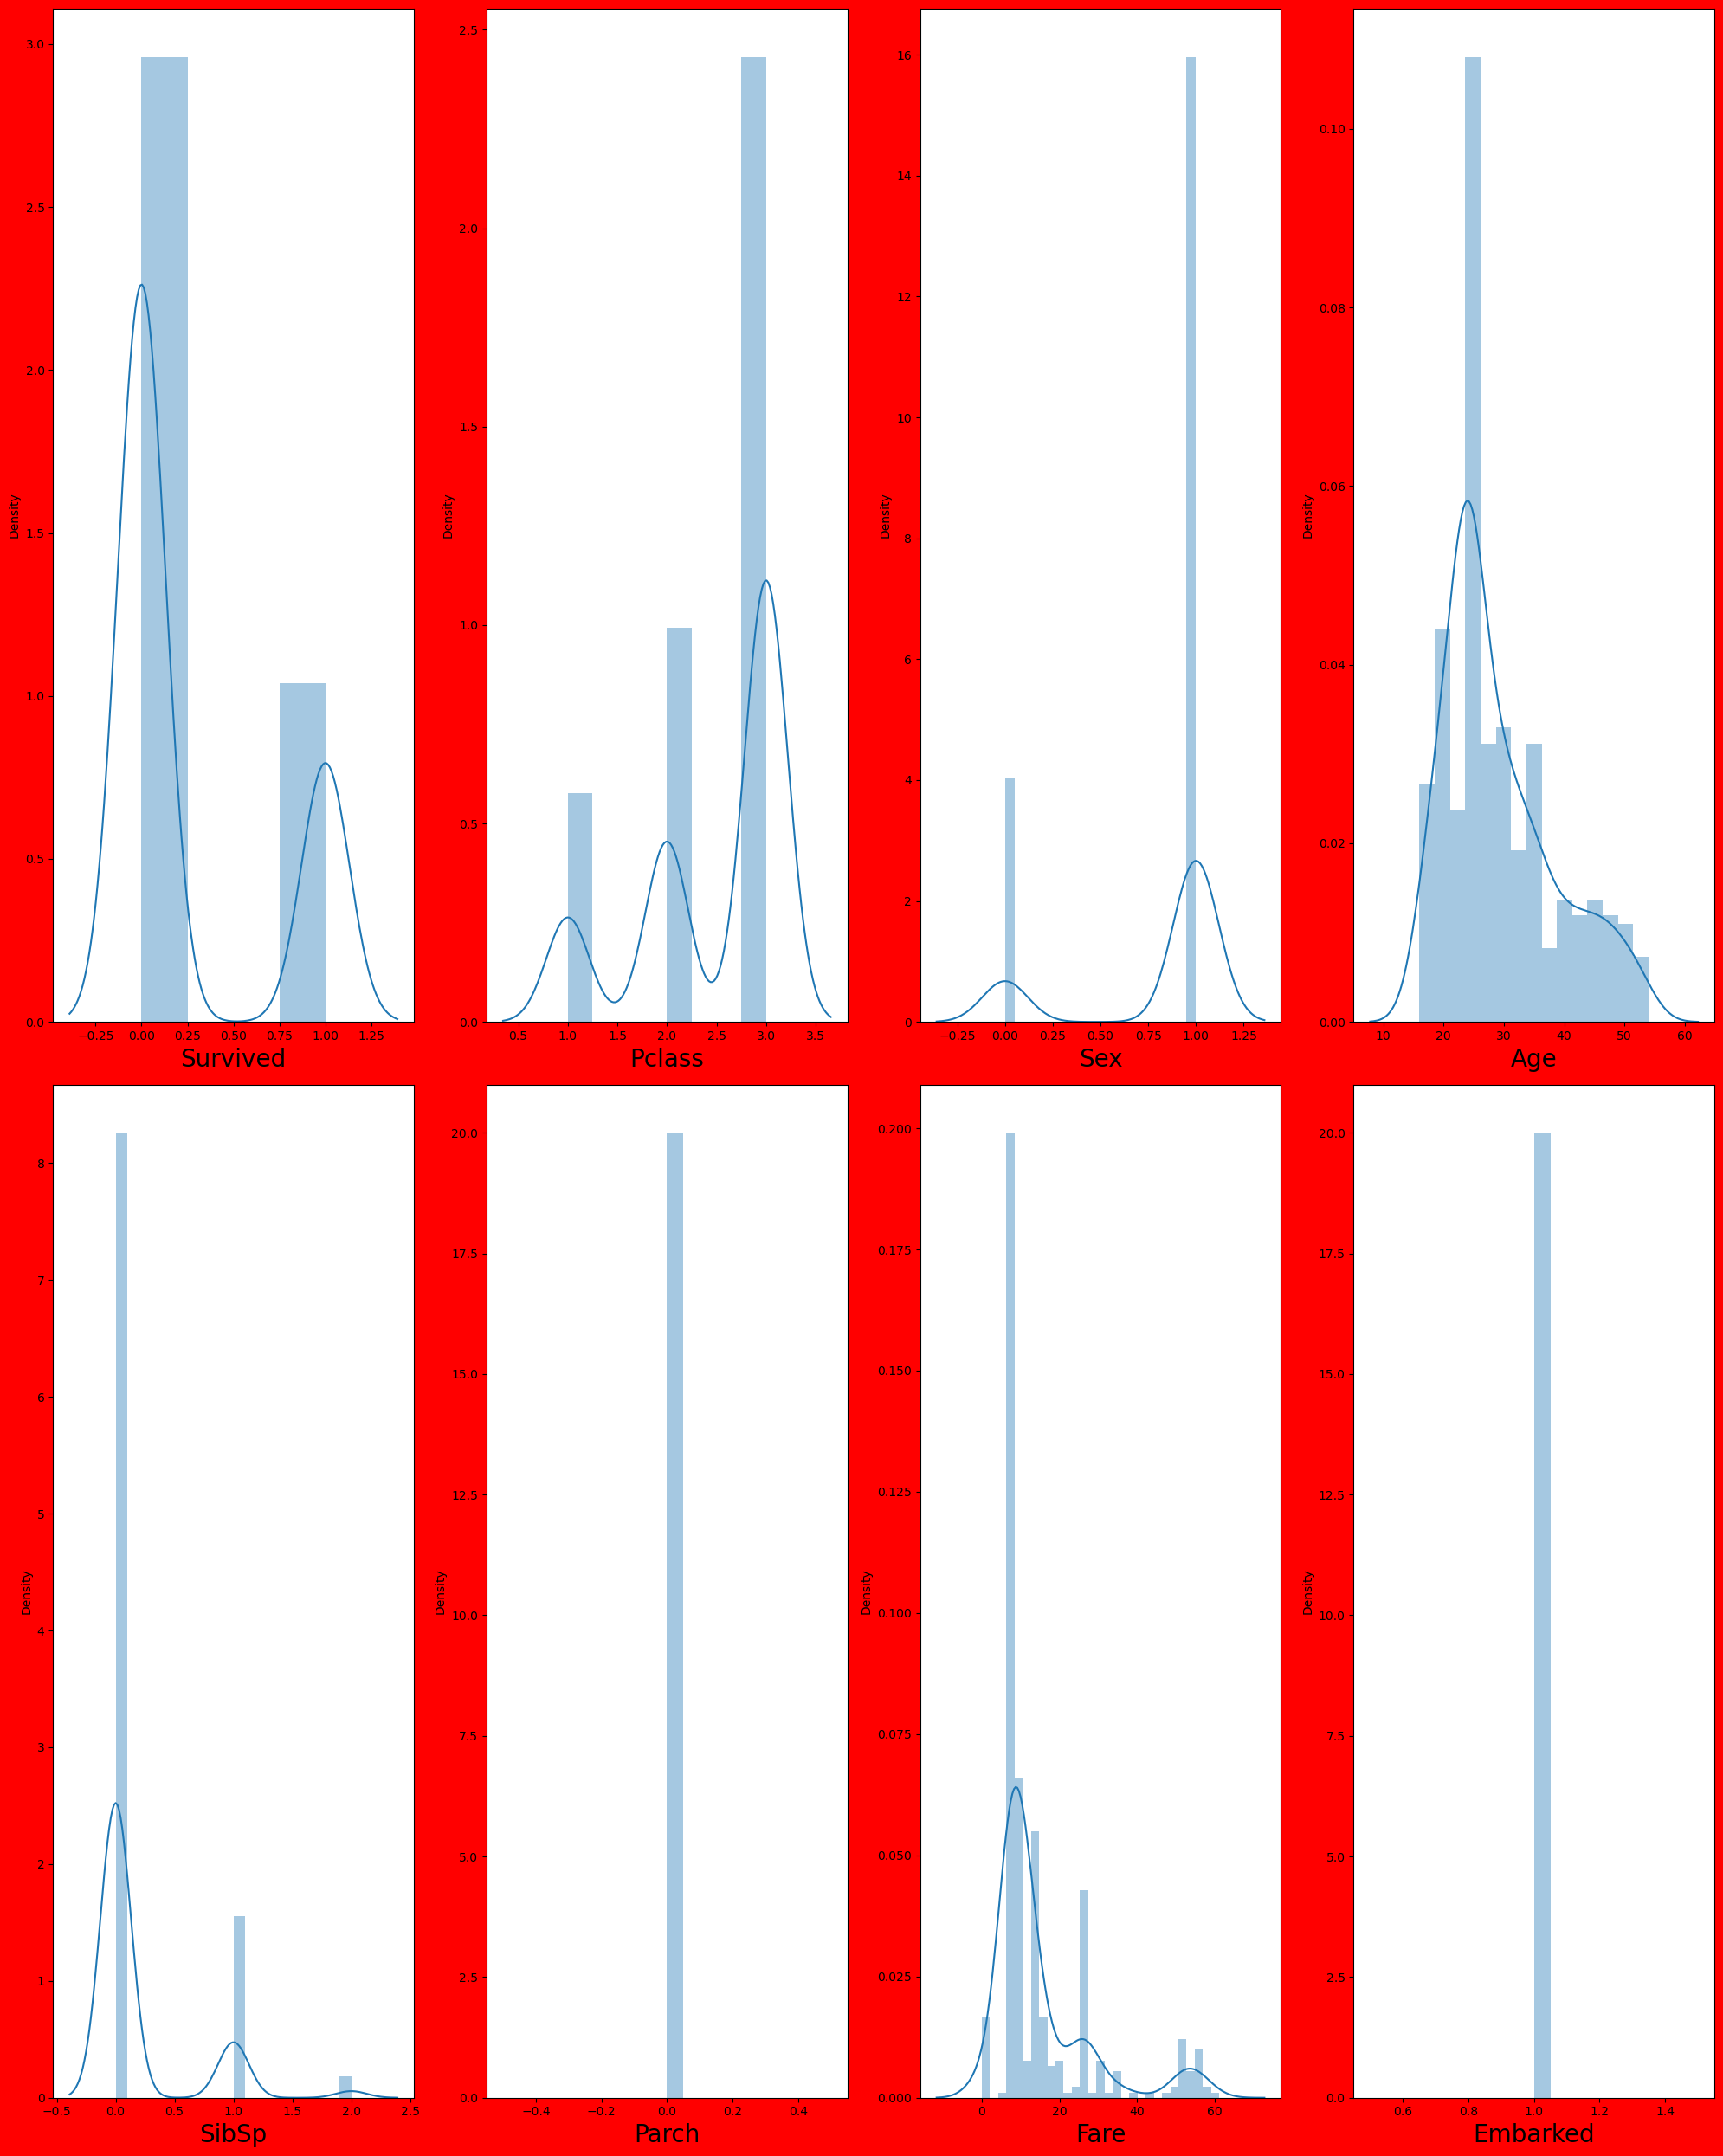

In [28]:
plt.figure(figsize=(20,25),facecolor='red')
plotnum=1
for column in live:
    if plotnum<=8:
        ax= plt.subplot(2,4,plotnum)
        sns.distplot(live[column])
        plt.xlabel(column, fontsize=20)
        
    plotnum+=1
    
plt.tight_layout()

In [29]:
X = live.drop('Survived', axis=1)
y = live['Survived']

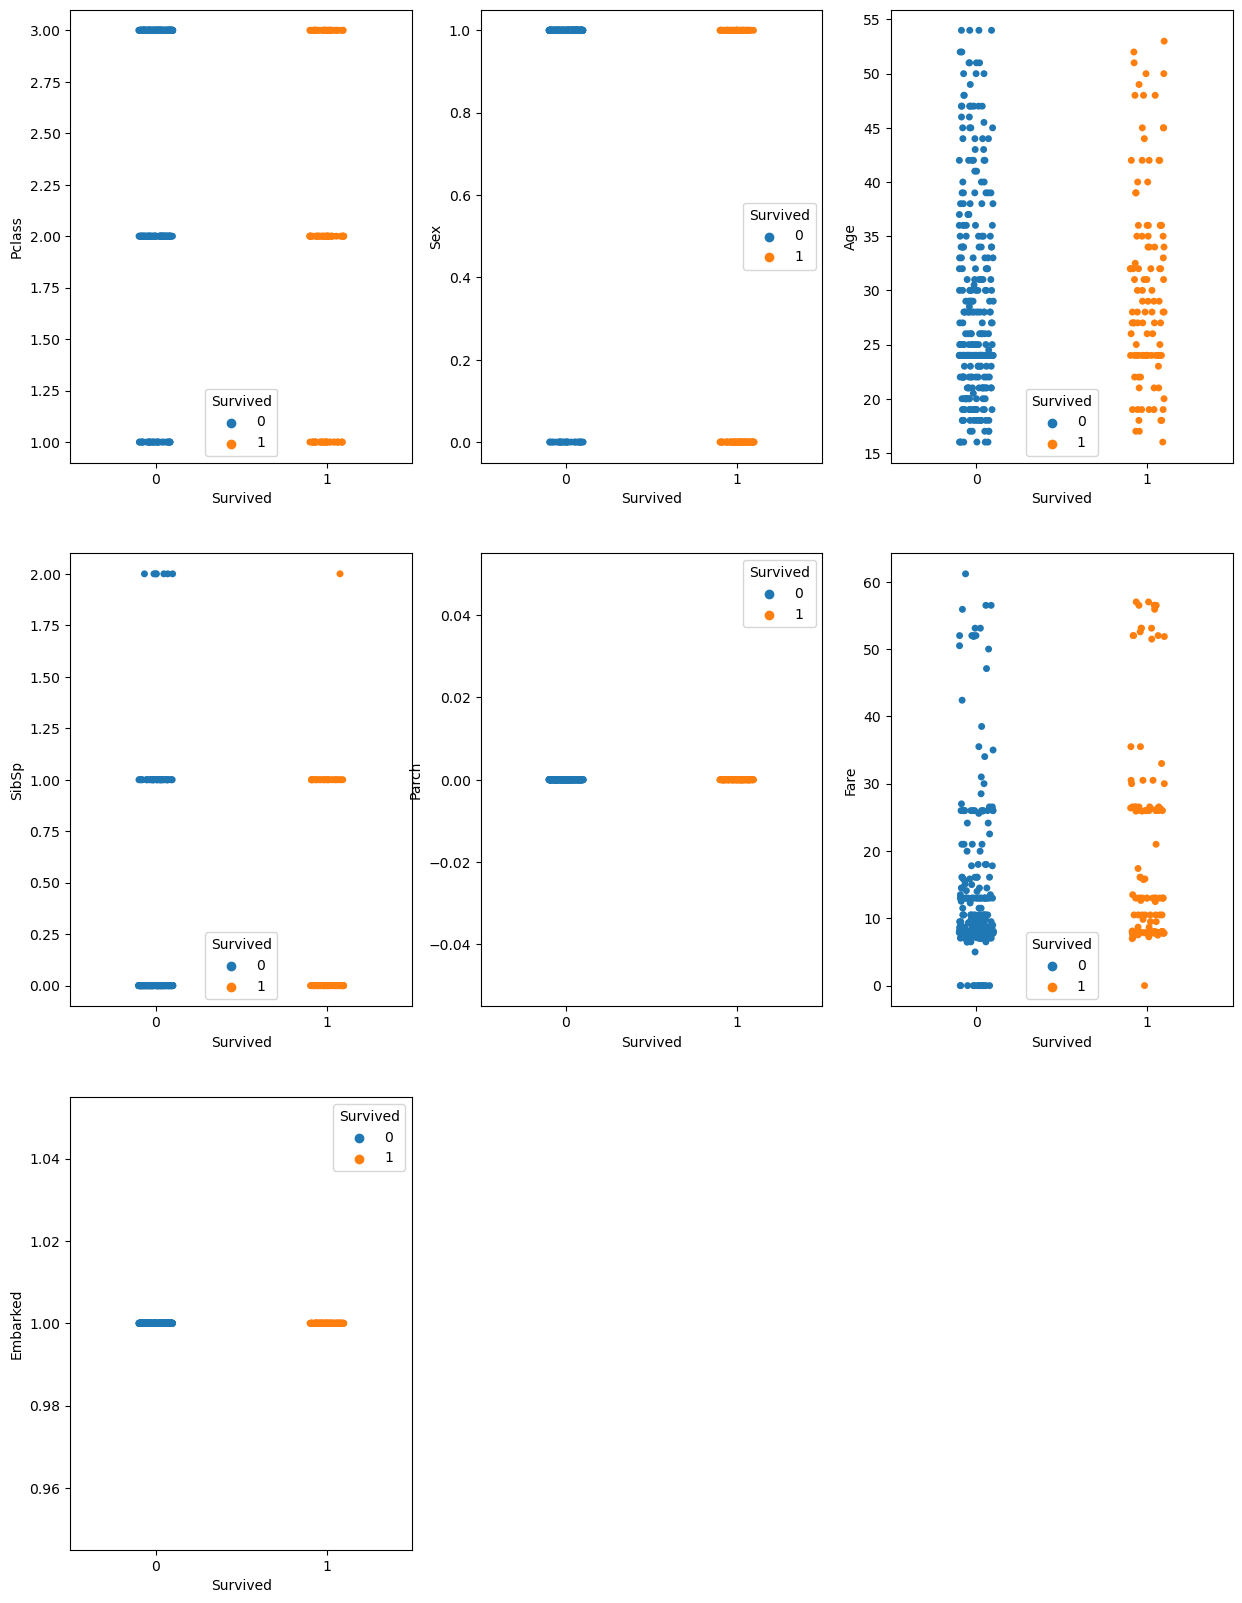

In [30]:
plt.figure(figsize=(15,20))
plotnumber = 1
for column in X:
    if plotnumber <=9:
        ax = plt.subplot(3,3, plotnumber)
        sns.stripplot(x=y, y=X[column],hue=y)
    plotnumber+=1
plt.show()

In [31]:
df_live= live.drop('Survived', axis=1)

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)


In [33]:
x_train, y_train, x_test, y_test= train_test_split(X_scaler,y,test_size=0.25, random_state=355)

In [34]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=428)

In [35]:
# Train the model
# Create the model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [36]:
# Evaluate the model
score = model.score(X_test, y_test)
print('The score of the model is:', score)

The score of the model is: 0.7962962962962963
